load both the tilt and flat cases and compare them in terms of buoyancy gradient

In [1]:
cd("/scratch/bcpi/cliu28/internal-tide-mixing/")
using Printf
using CairoMakie
using NCDatasets
using Statistics
using NaNStatistics

In [15]:
# this script plots terrain following horizontal averaged quantities
simnames = ["tilt", "flat"]
tᶠ = 460
if tᶠ ≤ 10
    output_mode = "verification"
elseif tᶠ ≤ 450
    output_mode = "spinup"
    time = 10:40:tᶠ
else
    output_mode = "analysis"
end

# Initialize dictionaries to store data for both simulations
Bz_avg_acc_dict = Dict()
b_avg_acc_dict = Dict()
u_avg_acc_dict = Dict()
what_avg_acc_dict = Dict()
τ_avg_acc_dict = Dict()
t_acc_dict = Dict()
z = nothing
time = vcat(10:40:450)

for simname in simnames
    # extracting data

    ds_init = Dataset(string("output/",simname,"/TF_avg_tᶠ=",time[1],"_", "verification",".nc"),"r")
    Bz_avg_acc = ds_init["Bz_avg"][:,:]
    u_avg_acc = ds_init["u_avg"][:,:]
    what_avg_acc = ds_init["what_avg"][:,:]
    τ_avg_acc = zeros(size(u_avg_acc))
    b_avg_acc = ds_init["b_avg"][:,:]
    t_acc = ds_init["t"][:]./(2*pi/1.4e-4)
    z = ds_init["bin_center"][:]
    close(ds_init)

    if output_mode == "spinup" || output_mode == "analysis"
        for i in eachindex(time)[2:end]
            file = string("output/",simname,"/TF_avg_tᶠ=",time[i],"_","spinup",".nc")
            ds = Dataset(file,"r")
            # Concatenate subsequent timesteps horizontally
            Bz_avg_acc = hcat(Bz_avg_acc, ds["Bz_avg"][:,:])
            b_avg_acc = hcat(b_avg_acc, ds["b_avg"][:,:])
            u_avg_acc = hcat(u_avg_acc, ds["u_avg"][:,:])
            what_avg_acc = hcat(what_avg_acc, ds["what_avg"][:,:])
            t_acc = round.(vcat(t_acc, ds["t"][:]./(2*pi/1.4e-4)))
            if haskey(ds, "τ_avg")
                τ_avg_acc = hcat(τ_avg_acc, ds["τ_avg"][:,:])
            else
                τ_avg_acc = hcat(τ_avg_acc, zeros(size(ds["u_avg"][:,:])))
            end
            close(ds)
            @info i
        end
    end
    # Store data in dictionaries
    Bz_avg_acc_dict[simname] = Bz_avg_acc
    b_avg_acc_dict[simname] = b_avg_acc
    u_avg_acc_dict[simname] = u_avg_acc
    what_avg_acc_dict[simname] = what_avg_acc
    τ_avg_acc_dict[simname] = τ_avg_acc
    t_acc_dict[simname] = t_acc
# we add this because TF_avg_tᶠ=450_spinup.nc does not contain TP=450 (the model stops before saving the last time average values)
    if simname=="tilt"
    fname = "output/tilt/TF_avg_tᶠ=450_spinup_440_450.nc"
    ds = Dataset(fname,"r")
    Bz_avg = ds["Bz_avg"][:,2]
    Bz_avg_acc_dict["tilt"][:,end] = Bz_avg
    u_avg = ds["u_avg"][:,2]
    u_avg_acc_dict["tilt"][:,end] = u_avg
    what_avg = ds["what_avg"][:,2]
    what_avg_acc_dict["tilt"][:,end] = what_avg
    τ_avg = ds["τ_avg"][:,2]
    τ_avg_acc_dict["tilt"][:,end] = τ_avg
    end

    if output_mode == "analysis"
        file = string("output/",simname,"/TF_avg_tᶠ=",tᶠ,"_",output_mode,".nc")
        ds = Dataset(file,"r")
        # Concatenate subsequent timesteps horizontally
        Bz_avg_acc_dict[simname] = hcat(Bz_avg_acc_dict[simname], mean(ds["Bz_avg"][:,:],dims=2))
        u_avg_acc_dict[simname] = hcat(u_avg_acc_dict[simname], mean(ds["u_avg"][:,:],dims=2))
        what_avg_acc_dict[simname] = hcat(what_avg_acc_dict[simname], mean(ds["what_avg"][:,:],dims=2))
        t_acc_dict[simname] = round.(vcat(t_acc, ds["t"][end]./(2*pi/1.4e-4)))
        # t_acc_dict[simname] = round.(vcat(t_acc, ds["t"][:]./(2*pi/1.4e-4)))
        if haskey(ds, "τ_avg")
            τ_avg_acc = hcat(τ_avg_acc, ds["τ_avg"][:,:])
        else
            τ_avg_acc = hcat(τ_avg_acc, zeros(size(ds["u_avg"][:,:])))
        end
        close(ds)
    end
end

┌ Info: 2
└ @ Main /scratch/bcpi/cliu28/internal-tide-mixing/postprocess/jl_notebook_cell_df34fa98e69747e1a8f8a730347b8e2f_W2sdnNjb2RlLXJlbW90ZQ==.jl:52
┌ Info: 3
└ @ Main /scratch/bcpi/cliu28/internal-tide-mixing/postprocess/jl_notebook_cell_df34fa98e69747e1a8f8a730347b8e2f_W2sdnNjb2RlLXJlbW90ZQ==.jl:52
┌ Info: 4
└ @ Main /scratch/bcpi/cliu28/internal-tide-mixing/postprocess/jl_notebook_cell_df34fa98e69747e1a8f8a730347b8e2f_W2sdnNjb2RlLXJlbW90ZQ==.jl:52
┌ Info: 5
└ @ Main /scratch/bcpi/cliu28/internal-tide-mixing/postprocess/jl_notebook_cell_df34fa98e69747e1a8f8a730347b8e2f_W2sdnNjb2RlLXJlbW90ZQ==.jl:52
┌ Info: 6
└ @ Main /scratch/bcpi/cliu28/internal-tide-mixing/postprocess/jl_notebook_cell_df34fa98e69747e1a8f8a730347b8e2f_W2sdnNjb2RlLXJlbW90ZQ==.jl:52
┌ Info: 7
└ @ Main /scratch/bcpi/cliu28/internal-tide-mixing/postprocess/jl_notebook_cell_df34fa98e69747e1a8f8a730347b8e2f_W2sdnNjb2RlLXJlbW90ZQ==.jl:52
┌ Info: 8
└ @ Main /scratch/bcpi/cliu28/internal-tide-mixing/postprocess/jl_notebo

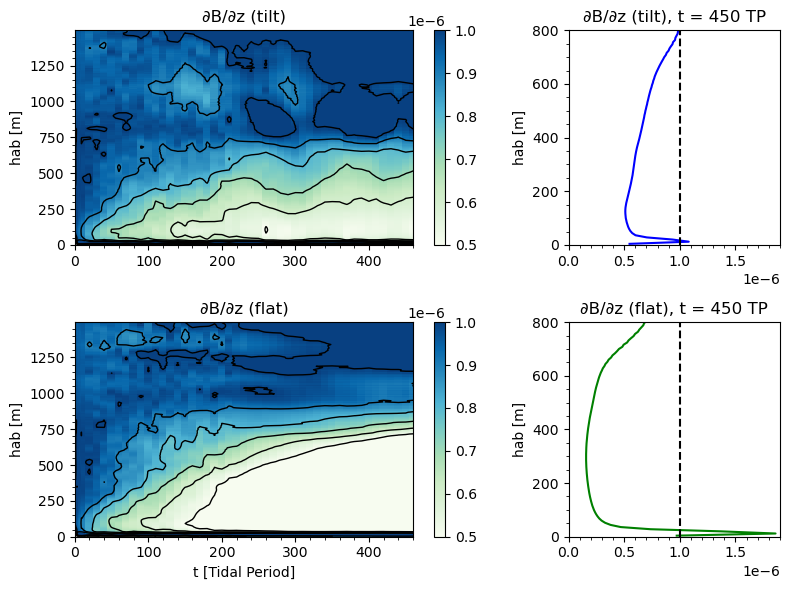

In [ ]:
# plot the difference in buoyancy gradient between tilt and flat cases
Bz_tilt = Bz_avg_acc_dict["tilt"]
Bz_flat = Bz_avg_acc_dict["flat"]
b_tilt = b_avg_acc_dict["tilt"]
b_flat = b_avg_acc_dict["flat"]
using PyPlot

# Adjust the width ratios for the columns
fig, axs = PyPlot.subplots(2, 2, figsize=(8, 6), gridspec_kw=Dict("width_ratios" => [2, 1], "height_ratios" => [1, 1]))

# First column: 2D plots
# First subplot (index 1 in Julia)
c1 = axs[1, 1].pcolor(t_acc_dict["tilt"], z, Bz_tilt, cmap="GnBu", shading="auto")
c1.set_clim(5e-7, 1e-6)
axs[1, 1].contour(t_acc_dict["tilt"], z, Bz_tilt, levels=range(5e-7, stop=10e-7, length=6), colors="black", linewidths=1)
axs[1, 1].set_title("∂B/∂z (tilt)")
axs[1, 1].set_ylabel("hab [m]")
axs[1, 1].minorticks_on()
axs[1, 1].set_xlim(0, 460)
fig.colorbar(c1, ax=axs[1, 1])

# Second subplot (index 2 in Julia)
c2 = axs[2, 1].pcolor(t_acc_dict["flat"], z, Bz_flat, cmap="GnBu", shading="auto")
c2.set_clim(5e-7, 1e-6)
axs[2, 1].contour(t_acc_dict["flat"], z, Bz_flat, levels=range(5e-7, stop=10e-7, length=6), colors="black", linewidths=1)
axs[2, 1].set_title("∂B/∂z (flat)")
axs[2, 1].set_xlabel("t [Tidal Period]")
axs[2, 1].set_ylabel("hab [m]")
axs[2, 1].minorticks_on()
axs[2, 1].set_xlim(0, 460)

# Second column: Profiles at the final timestep
# Tilt case
axs[1, 2].plot(Bz_tilt[:, end], z, label="Tilt", color="blue")
axs[1, 2].plot([1e-6,1e-6], [0,800], color="black", linestyle="--")
axs[1, 2].set_xlim(0, 1.9e-6)
axs[1, 2].set_ylim(0, 800)
axs[1, 2].set_title("∂B/∂z (tilt), t = 460 TP")
# axs[1, 2].set_xlabel("∂B/∂z")
axs[1, 2].set_ylabel("hab [m]")
axs[1, 2].minorticks_on()
# axs[1, 2].legend()

# Flat case
axs[2, 2].plot(Bz_flat[:, end], z, label="Flat", color="green")
axs[2, 2].plot([1e-6,1e-6], [0,800], color="black", linestyle="--")
axs[2, 2].set_xlim(0, 1.9e-6)
axs[2, 2].set_ylim(0, 800)
axs[2, 2].set_title("∂B/∂z (flat), t = 460 TP")
# axs[2, 2].set_xlabel("∂B/∂z")
axs[2, 2].set_ylabel("hab [m]")
axs[2, 2].minorticks_on()
# axs[2, 2].legend()

PyPlot.tight_layout()  # Adjust layout to make room for colorbar

colorbar(c2)
savefig("output/tilt/Bz_compare_analysis.png", dpi=300)
fig


In [11]:
t_acc_dict["tilt"][50:64]

15-element Vector{Float64}:
 410.0
 420.0
 430.0
 440.0
 450.0
 451.0
 452.0
 453.0
 454.0
 455.0
 456.0
 457.0
 458.0
 459.0
 460.0

In [ ]:
# Calculate the difference in buoyancy gradient between tilt and flat cases
u_tilt = u_avg_acc_dict["tilt"]
u_flat = u_avg_acc_dict["flat"]
what_tilt = what_avg_acc_dict["tilt"]
what_flat = what_avg_acc_dict["flat"]
τ_tilt = τ_avg_acc_dict["tilt"]
τ_flat = τ_avg_acc_dict["flat"]
using PyPlot
# Plot the differences in velocity, vertical velocity, and stress between tilt and flat cases

# Adjust the width ratios for the columns
fig, axs = PyPlot.subplots(3, 3, figsize=(10, 9), gridspec_kw=Dict("width_ratios" => [1, 1, 1], "height_ratios" => [1, 1, 1]))

# First column: 2D plots
# u_tilt
c1 = axs[1, 1].pcolor(t_acc_dict["tilt"], z, u_tilt, cmap="RdBu_r", shading="auto")
axs[1, 1].set_title("û (tilt)")
axs[1, 1].set_ylabel("hab [m]")
c1.set_clim(-0.02, 0.02)
axs[1, 1].minorticks_on()
axs[1, 1].set_xlim(215, 450)
cbar = fig.colorbar(c1, ax=axs[1, 1])
cbar.set_ticks(range(-0.02, 0.02, length=5))

# # u_flat
c2 = axs[2, 1].pcolor(t_acc_dict["flat"], z, u_flat, cmap="RdBu_r", shading="auto")
axs[2, 1].set_title("û (flat)")
axs[2, 1].set_ylabel("hab [m]")
c2.set_clim(-0.02, 0.02)
axs[2, 1].set_xlabel("t [Tidal Period]")
axs[2, 1].minorticks_on()
axs[2, 1].set_xlim(215, 450)
cbar = fig.colorbar(c2, ax=axs[2, 1])
cbar.set_ticks(range(-0.02, 0.02, length=5))

# # w_tilt
c3 = axs[1, 2].pcolor(t_acc_dict["tilt"], z, what_tilt, cmap="RdBu_r", shading="auto")
axs[1, 2].set_title("w (tilt)")
axs[1, 2].set_ylabel("hab [m]")
c3.set_clim(-0.001, 0.001)
axs[1, 2].minorticks_on()
axs[1, 2].set_xlim(215, 450)
cbar = fig.colorbar(c3, ax=axs[1, 2])
cbar.set_ticks(range(-0.001, 0.001, length=5))

# # w_flat
c2 = axs[2, 2].pcolor(t_acc_dict["flat"], z, what_flat, cmap="RdBu_r", shading="auto")
axs[2, 2].set_title("w (flat)")
axs[2, 2].set_ylabel("hab [m]")
axs[2, 2].set_xlabel("t [Tidal Period]")
c2.set_clim(-0.001, 0.001)
axs[2, 2].minorticks_on()
axs[2, 2].set_xlim(215, 450)
cbar = fig.colorbar(c2, ax=axs[2, 2])
cbar.set_ticks(range(-0.001, 0.001, length=5))

# τ_tilt
c5 = axs[1, 3].pcolor(t_acc_dict["tilt"], z, τ_tilt, cmap="PuOr_r", shading="auto")
axs[1, 3].set_title("τ (tilt)")
c5.set_clim(-0.002, 0.002)
axs[1, 3].set_ylabel("hab [m]")
axs[1, 3].minorticks_on()
axs[1, 3].set_xlim(215, 450)
cbar = fig.colorbar(c5, ax=axs[1, 3])
cbar.set_ticks(range(-0.002, 0.002, length=5))

# # τ_flat
c2 = axs[2, 3].pcolor(t_acc_dict["flat"], z, τ_flat, cmap="PuOr_r", shading="auto")
axs[2, 3].set_title("τ (flat)")
axs[2, 3].set_ylabel("hab [m]")
c2.set_clim(-0.002, 0.002)
axs[2, 3].set_xlabel("t [Tidal Period]")
axs[2, 3].minorticks_on()
axs[2, 3].set_xlim(215, 450)
cbar = fig.colorbar(c2, ax=axs[2, 3])
cbar.set_ticks(range(-0.002, 0.002, length=5))

# Second column: Profiles at the final timestep
# Velocity profile
axs[3, 1].plot(mean(u_tilt[:, 44:54],dims=2), z, label="Tilt", color="blue")
axs[3, 1].plot(mean(u_flat[:, 44:54],dims=2), z, label="Flat", color="green")
axs[3, 1].plot([0,0], [0,800], color="black", linestyle="--")
axs[3, 1].set_title("û, 350-450 tidal average")
axs[3, 1].set_xlim(-0.01, 0.01)
axs[3, 1].set_ylim(0, 800)
axs[3, 1].set_ylabel("hab [m]")
axs[3, 1].minorticks_on()
axs[3, 1].legend()

# # Vertical velocity profile
axs[3, 2].plot(mean(what_tilt[:, 44:54],dims=2), z, label="Tilt", color="blue")
axs[3, 2].plot(mean(what_flat[:, 44:54],dims=2), z, label="Flat", color="green")
axs[3, 2].plot([0,0], [0,800], color="black", linestyle="--")
axs[3, 2].set_title("w, 350-450 tidal average")
axs[3, 2].set_xlim(-0.003, 0.003)
axs[3, 2].set_ylim(0, 800)
axs[3, 2].set_ylabel("hab [m]")
axs[3, 2].minorticks_on()
axs[3, 2].legend()

# # Stress profile
axs[3, 3].plot(mean(τ_tilt[:, 44:54],dims=2), z, label="Tilt", color="blue")
axs[3, 3].plot(mean(τ_flat[:, 44:54],dims=2), z, label="Flat", color="green")
axs[3, 3].plot([0,0], [0,800], color="black", linestyle="--")
axs[3, 3].set_title("τ, 350-450 tidal average")
# axs[3, 3].set_xlim(-0.01, 0.01)
axs[3, 3].set_ylim(0, 800)
axs[3, 3].set_ylabel("hab [m]")
# axs[3, 3].set_xlabel("Stress [N/m²]")
axs[3, 3].minorticks_on()
axs[3, 3].legend()

PyPlot.tight_layout()  # Adjust layout to make room for colorbars

savefig("output/tilt/velocity_stress_compare_spinup.png", dpi=300)
fig

In [ ]:
τ_tilt = τ_avg_acc_dict["tilt"]


In [ ]:
t_acc_dict["tilt"][44:54]
